## Process CAS04 Data with Aurora

CAS04 was a trial station selected because it was first in alphabetical order from a collection of "recent" stations.  This station was used as a proof of concept to show that aurora could reproduce EMTF results for USArray data.

The steps are similar to the synthetic data workbook, but in this case we have a larger data set with more interesting things happening.

The data are already created and available on the IRIS ftp website:

http://ftp.iris.washington.edu/pub/dropoff/buffer/MT_test_data/

but they can also be generated using aurora/tests/CAS04/01_make_cas04_mth5.py

This notebook starts from an existing h5 file.

1. Create the synthetic mth5  [IGNORE]
2. Get a Run Summary from the mth5
3. Select the station to process and optionally the remote reference station
4. Create a processing config
5. Generate TFs
6. Archive the TFs (in emtf_xml or z-file)

In [1]:
# Uncomment the following line to make plots interactive.
# %matplotlib widget

### Here are the modules we will need to import 

In [2]:
import pathlib
import warnings

import pandas as pd

from aurora.config.config_creator import ConfigCreator
from aurora.pipelines.process_mth5 import process_mth5
from aurora.pipelines.run_summary import RunSummary
from aurora.test_utils.synthetic.make_mth5_from_asc import create_test12rr_h5
from aurora.test_utils.synthetic.paths import DATA_PATH
from aurora.transfer_function.kernel_dataset import KernelDataset
from mth5.utils.helpers import initialize_mth5
warnings.filterwarnings('ignore')

2022-10-15 18:22:25,980 [line 135] mth5.setup_logger - INFO: Logging file can be found /home/kkappler/software/irismt/mth5/logs/mth5_debug.log


## Define mth5 file

The file should probably be placed into a dedicated data directory but for this test the data are put here, in the same directory as this notebook.

In [3]:
mth5_path = pathlib.Path("8P_CAS04_CAV07_NVR11_REV06.h5")

In [4]:
m = initialize_mth5(mth5_path)

In [5]:
channel_summary_df = m.channel_summary.to_dataframe()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(channel_summary_df)
    #channel_summary_df

,survey,station,run,latitude,longitude,elevation,component,start,end,n_samples,sample_rate,measurement_type,azimuth,tilt,units,hdf5_reference,run_hdf5_reference,station_hdf5_reference
0,CONUS South,CAS04,a,37.633351,-121.468382,329.38750,ex,2020-06-02 18:41:43+00:00,2020-06-02 22:07:46+00:00,12364,1.0,electric,13.2,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
1,CONUS South,CAS04,a,37.633351,-121.468382,329.38750,ey,2020-06-02 18:41:43+00:00,2020-06-02 22:07:46+00:00,12364,1.0,electric,103.2,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
2,CONUS South,CAS04,a,37.633351,-121.468382,329.38750,hx,2020-06-02 18:41:43+00:00,2020-06-02 22:07:46+00:00,12364,1.0,magnetic,13.2,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
3,CONUS South,CAS04,a,37.633351,-121.468382,329.38750,hy,2020-06-02 18:41:43+00:00,2020-06-02 22:07:46+00:00,12364,1.0,magnetic,103.2,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
4,CONUS South,CAS04,a,37.633351,-121.468382,329.38750,hz,2020-06-02 18:41:43+00:00,2020-06-02 22:07:46+00:00,12364,1.0,magnetic,0.0,90.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
5,CONUS South,CAS04,b,37.633351,-121.468382,329.38750,ex,2020-06-02 22:24:55+00:00,2020-06-12 17:52:23+00:00,847649,1.0,electric,13.2,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
6,CONUS South,CAS04,b,37.633351,-121.468382,329.38750,ey,2020-06-02 22:24:55+00:00,2020-06-12 17:52:23+00:00,847649,1.0,electric,103.2,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
7,CONUS South,CAS04,b,37.633351,-121.468382,329.38750,hx,2020-06-02 22:24:55+00:00,2020-06-12 17:52:23+00:00,847649,1.0,magnetic,13.2,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
8,CONUS South,CAS04,b,37.633351,-121.468382,329.38750,hy,2020-06-02 22:24:55+00:00,2020-06-12 17:52:23+00:00,847649,1.0,magnetic,103.2,0.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
9,CONUS South,CAS04,b,37.633351,-121.468382,329.38750,hz,2020-06-02 22:24:55+00:00,2020-06-12 17:52:23+00:00,847649,1.0,magnetic,0.0,90.0,digital counts,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>


## Get a Run Summary

Note that we didn't need to explicitly open the mth5 to do that, we can pass the path if we want

In [6]:
mth5_run_summary = RunSummary()
mth5_run_summary.from_mth5s([mth5_path,])
run_summary = mth5_run_summary.clone()
run_summary.mini_summary

2022-10-15 18:22:26,542 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing 8P_CAS04_CAV07_NVR11_REV06.h5


,survey,station_id,run_id,start,end
0,CONUS South,CAS04,a,2020-06-02 18:41:43+00:00,2020-06-02 22:07:46+00:00
1,CONUS South,CAS04,b,2020-06-02 22:24:55+00:00,2020-06-12 17:52:23+00:00
2,CONUS South,CAS04,c,2020-06-12 18:32:17+00:00,2020-07-01 17:32:59+00:00
3,CONUS South,CAS04,d,2020-07-01 19:36:55+00:00,2020-07-13 21:46:12+00:00
4,CONUS South,CAV07,a,2020-06-09 23:21:35+00:00,2020-06-09 23:54:43+00:00
5,CONUS South,CAV07,b,2020-06-10 03:20:38+00:00,2020-06-10 03:36:12+00:00
6,CONUS South,CAV07,c,2020-06-10 03:50:04+00:00,2020-06-23 17:35:37+00:00
7,CONUS South,CAV07,d,2020-06-23 18:38:51+00:00,2020-07-06 16:31:12+00:00
8,CONUS South,NVR11,none,2020-06-12 21:10:38+00:00,2020-06-12 21:59:40+00:00
9,CONUS South,NVR11,a,2020-06-12 22:13:24+00:00,2020-06-26 19:35:21+00:00


Here we can see that the run summary is much more interesting than the synthetic example.  We have four stations and each station has mulitple runs.


### Select Stations to Process

Process CAS04, with respect to CAV07

## Define a Kernel Dataset


In [7]:
local_station_id = "CAS04"
remote_station_id = "CAV07" 

In [8]:
kernel_dataset = KernelDataset()
kernel_dataset.from_run_summary(run_summary, local_station_id, remote_station_id)
kernel_dataset.mini_summary

,survey,station_id,run_id,start,end
0,CONUS South,CAS04,b,2020-06-09 23:21:35+00:00,2020-06-09 23:54:43+00:00
1,CONUS South,CAV07,a,2020-06-09 23:21:35+00:00,2020-06-09 23:54:43+00:00
2,CONUS South,CAS04,b,2020-06-10 03:20:38+00:00,2020-06-10 03:36:12+00:00
3,CONUS South,CAV07,b,2020-06-10 03:20:38+00:00,2020-06-10 03:36:12+00:00
4,CONUS South,CAS04,b,2020-06-10 03:50:04+00:00,2020-06-12 17:52:23+00:00
5,CONUS South,CAV07,c,2020-06-10 03:50:04+00:00,2020-06-12 17:52:23+00:00
6,CONUS South,CAS04,c,2020-06-12 18:32:17+00:00,2020-06-23 17:35:37+00:00
7,CONUS South,CAV07,c,2020-06-12 18:32:17+00:00,2020-06-23 17:35:37+00:00
8,CONUS South,CAS04,c,2020-06-23 18:38:51+00:00,2020-07-01 17:32:59+00:00
9,CONUS South,CAV07,d,2020-06-23 18:38:51+00:00,2020-07-01 17:32:59+00:00


THere are som short runs here, see the "duration" column in the full df:

In [9]:
kernel_dataset.df


,survey,station_id,run_id,start,end,sample_rate,input_channels,output_channels,channel_scale_factors,mth5_path,remote,duration
0,CONUS South,CAS04,b,2020-06-09 23:21:35+00:00,2020-06-09 23:54:43+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",8P_CAS04_CAV07_NVR11_REV06.h5,False,1988.0
1,CONUS South,CAV07,a,2020-06-09 23:21:35+00:00,2020-06-09 23:54:43+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",8P_CAS04_CAV07_NVR11_REV06.h5,True,1988.0
2,CONUS South,CAS04,b,2020-06-10 03:20:38+00:00,2020-06-10 03:36:12+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",8P_CAS04_CAV07_NVR11_REV06.h5,False,934.0
3,CONUS South,CAV07,b,2020-06-10 03:20:38+00:00,2020-06-10 03:36:12+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",8P_CAS04_CAV07_NVR11_REV06.h5,True,934.0
4,CONUS South,CAS04,b,2020-06-10 03:50:04+00:00,2020-06-12 17:52:23+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",8P_CAS04_CAV07_NVR11_REV06.h5,False,223339.0
5,CONUS South,CAV07,c,2020-06-10 03:50:04+00:00,2020-06-12 17:52:23+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",8P_CAS04_CAV07_NVR11_REV06.h5,True,223339.0
6,CONUS South,CAS04,c,2020-06-12 18:32:17+00:00,2020-06-23 17:35:37+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",8P_CAS04_CAV07_NVR11_REV06.h5,False,947000.0
7,CONUS South,CAV07,c,2020-06-12 18:32:17+00:00,2020-06-23 17:35:37+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",8P_CAS04_CAV07_NVR11_REV06.h5,True,947000.0
8,CONUS South,CAS04,c,2020-06-23 18:38:51+00:00,2020-07-01 17:32:59+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",8P_CAS04_CAV07_NVR11_REV06.h5,False,687248.0
9,CONUS South,CAV07,d,2020-06-23 18:38:51+00:00,2020-07-01 17:32:59+00:00,1.0,"[hx, hy]","[ex, ey, hz]","{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",8P_CAS04_CAV07_NVR11_REV06.h5,True,687248.0


So we can drop some of these rows

In [10]:
kernel_dataset.drop_runs_shorter_than(10000)
    

In [11]:
kernel_dataset.mini_summary

,survey,station_id,run_id,start,end
0,CONUS South,CAS04,b,2020-06-10 03:50:04+00:00,2020-06-12 17:52:23+00:00
1,CONUS South,CAV07,c,2020-06-10 03:50:04+00:00,2020-06-12 17:52:23+00:00
2,CONUS South,CAS04,c,2020-06-12 18:32:17+00:00,2020-06-23 17:35:37+00:00
3,CONUS South,CAV07,c,2020-06-12 18:32:17+00:00,2020-06-23 17:35:37+00:00
4,CONUS South,CAS04,c,2020-06-23 18:38:51+00:00,2020-07-01 17:32:59+00:00
5,CONUS South,CAV07,d,2020-06-23 18:38:51+00:00,2020-07-01 17:32:59+00:00
6,CONUS South,CAS04,d,2020-07-01 19:36:55+00:00,2020-07-06 16:31:12+00:00
7,CONUS South,CAV07,d,2020-07-01 19:36:55+00:00,2020-07-06 16:31:12+00:00


## Now define the processing Configuration

The only things we need to provide are our band processing scheme, and the data sample rate to generate a default processing configuration.

The config is then told about the stations via the kernel dataset.

**When doing only single station processing you need to specify RME processing (rather than remote reference processing which expects extra time series from another station)

In [12]:
cc = ConfigCreator()
config = cc.create_from_kernel_dataset(kernel_dataset)

Bands not defined; setting to EMTF BANDS_DEFAULT_FILE
/home/kkappler/software/irismt/aurora/aurora/config/emtf_band_setup/bs_test.cfg
OK


In [13]:
for decimation in config.decimations:
    decimation.window.type = "hamming"

## Call process_mth5

DATASET DF POPULATED
Processing config indicates 4 decimation levels 
DATASET DF UPDATED
Processing band 25.728968s
Processing band 19.929573s
Processing band 15.164131s
Processing band 11.746086s
Processing band 9.195791s
Processing band 7.362526s
Processing band 5.856115s
Processing band 4.682492s


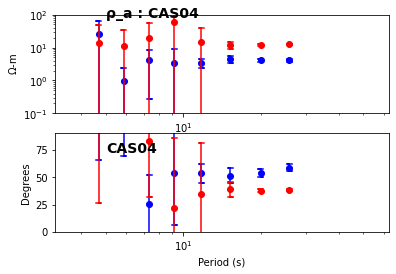

DECIMATION LEVEL 1
DATASET DF UPDATED
Processing band 102.915872s
Processing band 85.631182s
Processing band 68.881694s
Processing band 54.195827s
Processing band 43.003958s
Processing band 33.310722s


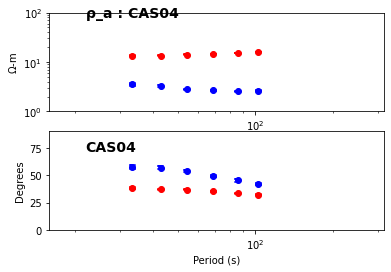

DECIMATION LEVEL 2
DATASET DF UPDATED
Processing band 411.663489s
Processing band 342.524727s
Processing band 275.526776s
Processing band 216.783308s
Processing band 172.015831s
Processing band 133.242890s


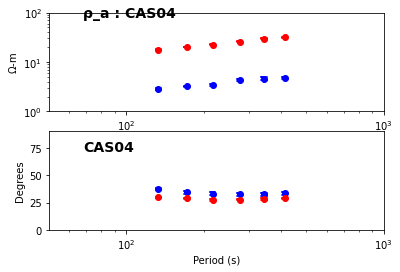

DECIMATION LEVEL 3
DATASET DF UPDATED
Processing band 1514.701336s
Processing band 1042.488956s
Processing band 723.371271s
Processing band 532.971560s
Processing band 412.837995s


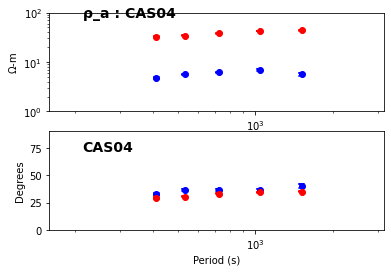

2022-10-15 18:23:56,278 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing 8P_CAS04_CAV07_NVR11_REV06.h5
2022-10-15 18:23:56,554 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing 8P_CAS04_CAV07_NVR11_REV06.h5


In [14]:
show_plot = True
tf_cls = process_mth5(config,
                    kernel_dataset,
                    units="MT",
                    show_plot=show_plot,
                    z_file_path=None,
                )

In [15]:
xml_file_base = f"{local_station_id}_RR{remote_station_id}.xml"
tf_cls.write_tf_file(fn=xml_file_base, file_type="emtfxml")


2022-10-15 18:23:56,651 [line 205] mt_metadata.transfer_functions.io.readwrite.write_file - INFO: Wrote CAS04_RRCAV07.xml


EMTFXML(station='CAS04', latitude=37.63, longitude=-121.47, elevation=329.39)

### The Default Processing Configuration is "tuned"

We can modify some of the processing parameters.  Here is an example that shows a more naive processing configuration can give less trustworthy results.

In [16]:
for decimation in config.decimations:
    decimation.prewhitening_type =  ""
    decimation.window.type = "boxcar"
    decimation.extra_pre_fft_detrend_type = None
    

DATASET DF POPULATED
Processing config indicates 4 decimation levels 
DATASET DF UPDATED
Processing band 25.728968s
Processing band 19.929573s
Processing band 15.164131s
Processing band 11.746086s
Processing band 9.195791s
Processing band 7.362526s
Processing band 5.856115s
Processing band 4.682492s


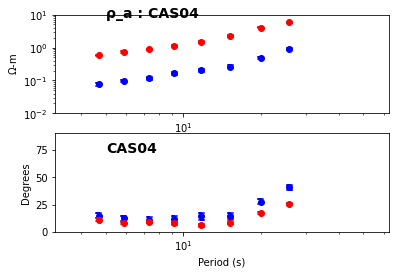

DECIMATION LEVEL 1
DATASET DF UPDATED
Processing band 102.915872s
Processing band 85.631182s
Processing band 68.881694s
Processing band 54.195827s
Processing band 43.003958s
Processing band 33.310722s


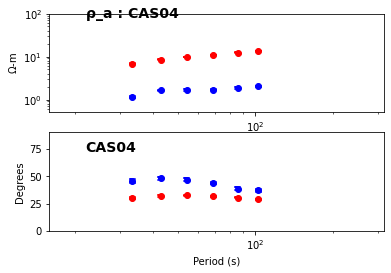

DECIMATION LEVEL 2
DATASET DF UPDATED
Processing band 411.663489s
Processing band 342.524727s
Processing band 275.526776s
Processing band 216.783308s
Processing band 172.015831s
Processing band 133.242890s


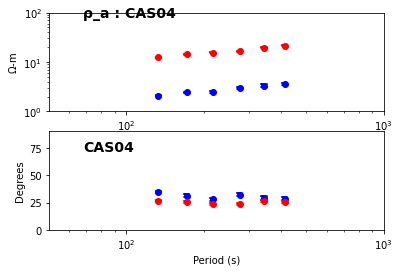

DECIMATION LEVEL 3
DATASET DF UPDATED
Processing band 1514.701336s
Processing band 1042.488956s
Processing band 723.371271s
Processing band 532.971560s
Processing band 412.837995s


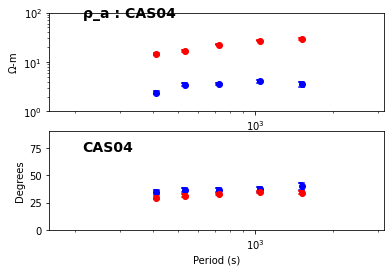

2022-10-15 18:25:22,474 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing 8P_CAS04_CAV07_NVR11_REV06.h5
2022-10-15 18:25:22,785 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing 8P_CAS04_CAV07_NVR11_REV06.h5


In [17]:
show_plot = True
tf_cls = process_mth5(config,
                    kernel_dataset,
                    units="MT",
                    show_plot=show_plot,
                    z_file_path=None,
                )